# Lab 3: Iterative Algorithm Design

### Problem 1: Determine if a Point is Located Inside a Polygon

In [55]:
import time
import random 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [56]:
def is_point_inside_polygon(polygon_vertices, point):
    """
    Determine if a point lies inside or outside a polygon using a ray-casting algorithm.

    Parameters:
    vertices -- list of tuples [(x1, y1), (x2, y2), ..., (xn, yn)] representing the polygon's vertices
    location_to_test -- tuple (x, y) representing the point to be tested
    
    Returns:
    True if the point is inside the polygon, False otherwise
    """
    
    # Initialize crossing count
    crossings = 0
    test_point_x, test_point_y = point

    for i_vertex in range(len(polygon_vertices)):
        segment_start_x, segment_start_y = polygon_vertices[i_vertex]
        
        # If we're at the last vertex, connect it to the first vertex
        if i_vertex < len(polygon_vertices) - 1:
            segment_end_x, segment_end_y = polygon_vertices[i_vertex + 1]
        else:
            segment_end_x, segment_end_y = polygon_vertices[0]

        # Check that the ray falls within the range of x values for the start and end of the segment
        if ((segment_start_x < test_point_x < segment_end_x) or 
            (segment_start_x > test_point_x > segment_end_x)):
            
            # Calculate the intersection point in the y direction
            t = (test_point_x - segment_end_x) / (segment_start_x - segment_end_x)
            crossing_y = (t * segment_start_y) + ((1 - t) * segment_end_y)
            
            # Check if the ray crosses the segment above the point
            if crossing_y >= test_point_y:
                crossings += 1

        # Special case: check if the point lies exactly on a vertical segment
        if (segment_start_x == test_point_x and 
            min(segment_start_y, segment_end_y) <= test_point_y <= max(segment_start_y, segment_end_y)):
            return True  # Point is on the boundary

    # If the number of crossings is odd, the point is inside; otherwise, it's outside
    return crossings % 2 != 0

# Example usage
vertices = [(1, 1), (5, 1), (5, 5), (1, 5)]  # Polygon vertices
test_point = (3, 3)  # Point to check
print(is_point_inside_polygon(vertices, test_point))  # Output: True (Point is inside)


True


### Test cases to check the functionality of our code


## Benchmarking 

In [71]:
# Function to generate a random polygon with n vertices
def generate_random_polygon(n, max_x=100, max_y=100):
    return [(random.randint(0, max_x), random.randint(0, max_y)) for _ in range(n)]

In [72]:
# Benchmarking function
def benchmark_polygon(point, start_size, end_size, step):
    times = []
    sizes = list(range(start_size, end_size, step))
    for size in sizes:
        polygon = generate_random_polygon(size)
        start_time = time.time()
        is_point_inside_polygon(polygon, point)
        end_time = time.time()
        times.append(end_time - start_time)
    return sizes, times


In [73]:
# Benchmarking Parameters
start_size = 10
end_size = 1000
step = 50

In [74]:
sizes, times = benchmark_polygon(test_point, start_size, end_size, step)


In [75]:
# Create a DataFrame for the benchmark results
benchmark_data = pd.DataFrame({
    'Polygon Size': sizes,
    'Execution Time (seconds)': times
})

In [76]:
display(benchmark_data)

,Polygon Size,Execution Time (seconds)
0,10,0.000
1,60,0.000
2,110,0.000
3,160,0.000
4,210,0.000
5,260,0.000
6,310,0.000
7,360,0.000
8,410,0.000
9,460,0.000


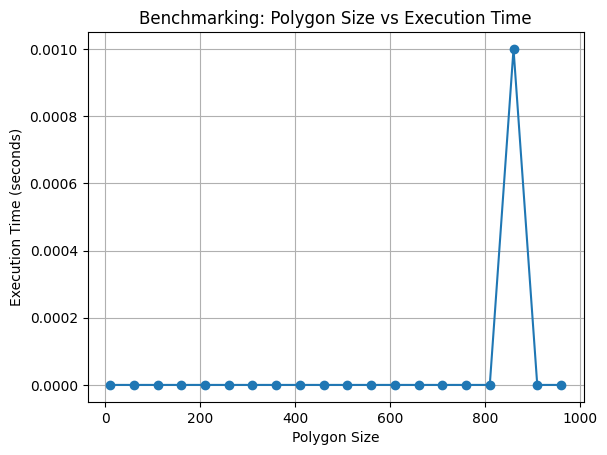

In [77]:
# Plot the results
plt.plot(sizes, times, marker='o')
plt.xlabel('Polygon Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Benchmarking: Polygon Size vs Execution Time')
plt.grid(True)
plt.show()